In [1]:
import os
from dotenv import load_dotenv
import sys

In [2]:
load_dotenv()
lib_dir = os.environ.get("LOCAL_LIB_DIR")
sys.path.append(lib_dir)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import naca4digit_airfoil as naca4digit_airfoil

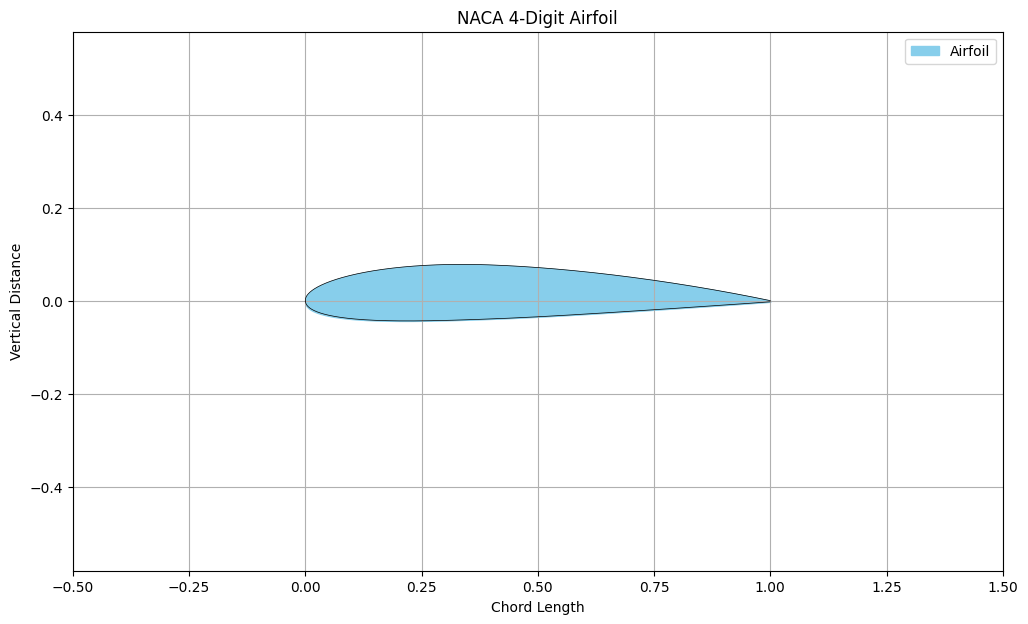

In [4]:
# Define airfoil parameters (example: NACA 2412)
chord = 1.0
m = 0.02  # maximum camber
p = 0.4   # position of maximum camber
t = 0.12  # maximum thickness
num_points = 100

airfoil = naca4digit_airfoil.Naca4DigitAirfoil(chord, m, p, t)

fig, ax = plt.subplots(figsize=(12, 7))
airfoil.plot(ax=ax)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-1.5, 1.5)
plt.show()

In [5]:
x_in, y_in = airfoil.generate_interior_points()

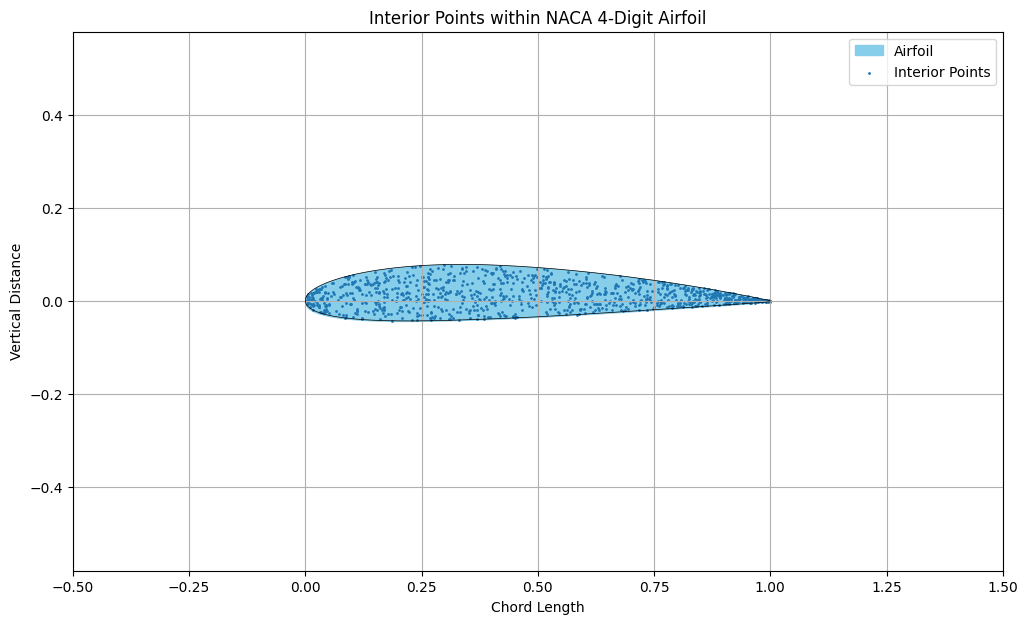

In [6]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 7))
airfoil.plot(ax=ax)
ax.scatter(x_in, y_in, s=1, label='Interior Points')
ax.set_title('Interior Points within NACA 4-Digit Airfoil')
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.legend()
plt.show()

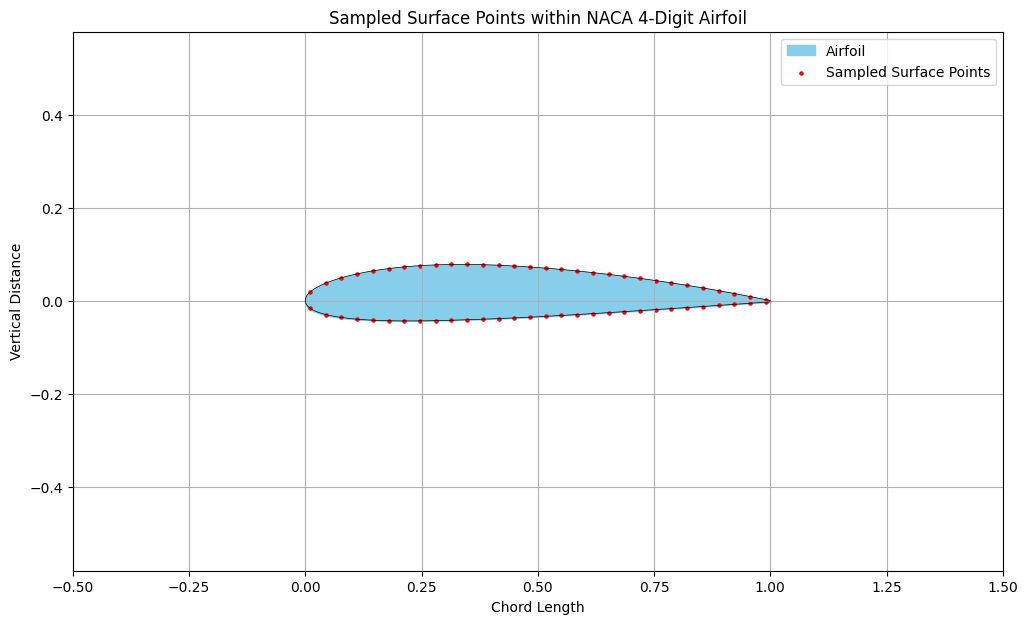

In [7]:
x_sampled, y_sampled = airfoil.sample_surface_points(30)

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))
airfoil.plot(ax=ax)
ax.scatter(x_sampled, y_sampled, s=5, label='Sampled Surface Points', c='r')
ax.set_title('Sampled Surface Points within NACA 4-Digit Airfoil')
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.legend()
plt.show()

In [8]:
# Sample points for classification
x_values = np.random.uniform(low=-.5, high=1.5, size=1000)
y_values = np.random.uniform(low=-1.5, high=1.5, size=1000)

interior_points, exterior_points = airfoil.classify_points(np.column_stack((x_values, y_values)))

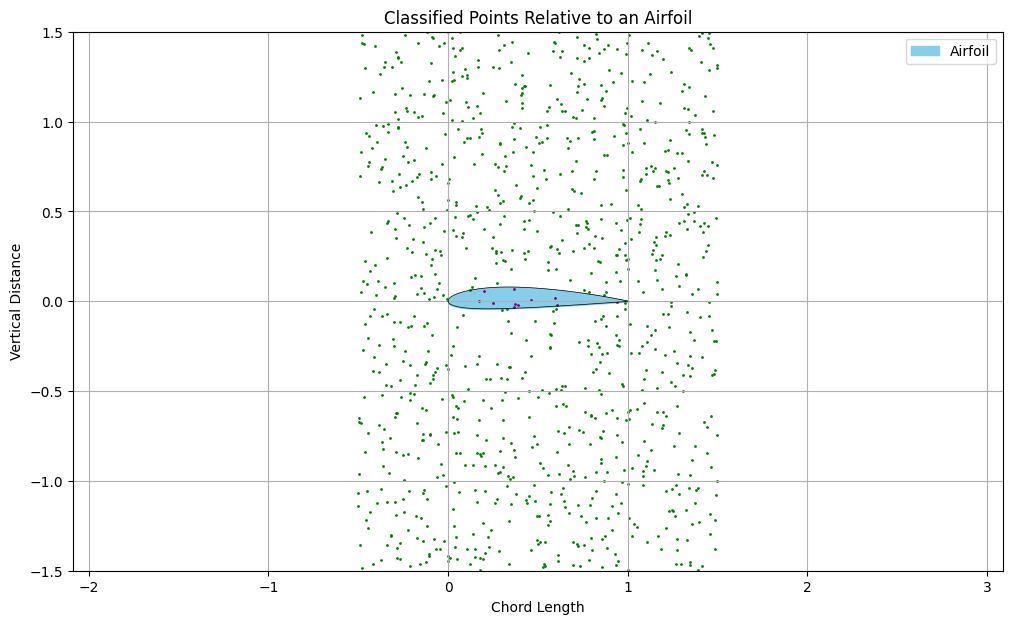

In [9]:
fig, ax = plt.subplots(figsize=(12, 7))
airfoil.plot(ax=ax)
if len(exterior_points) > 0:
    ax.scatter(exterior_points[:, 0], exterior_points[:, 1], s=1, color='green', label='Exterior Points')
if len(interior_points) > 0:
    ax.scatter(interior_points[:, 0], interior_points[:, 1], s=1, color='purple', label='Interior Points')
ax.set_title('Classified Points Relative to an Airfoil')
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-1.5, 1.5)
plt.show()

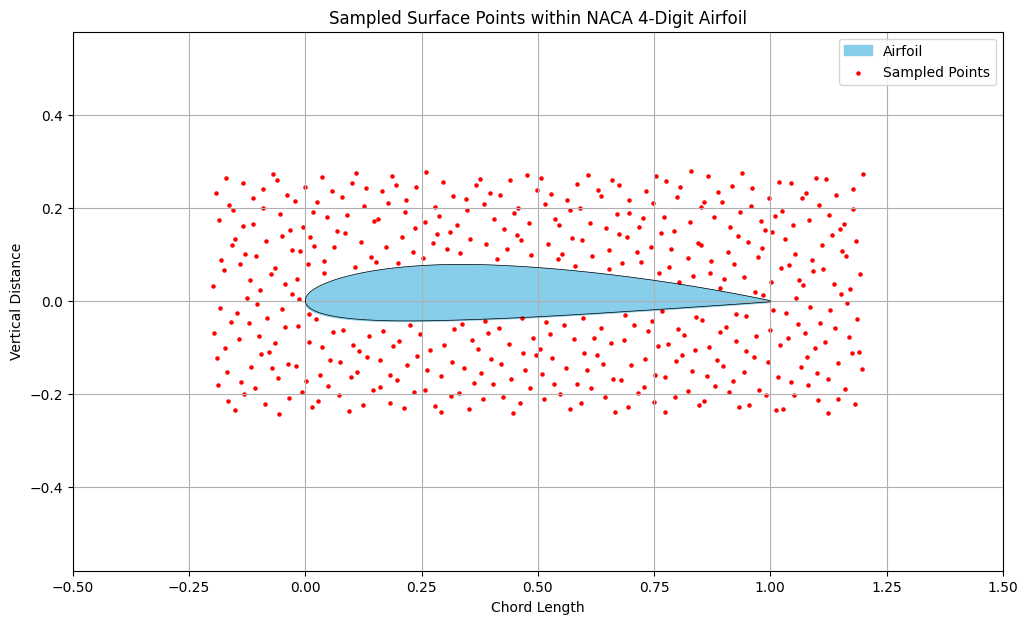

In [10]:
x_sampled, y_sampled = airfoil.sample_points_in_domain_around(1000, 0.2*airfoil.chord)
_, exterior_points = airfoil.classify_points(np.column_stack((x_sampled, y_sampled)))
x_sampled = exterior_points[:, 0]
y_sampled = exterior_points[:, 1]

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))
airfoil.plot(ax=ax)
ax.scatter(x_sampled, y_sampled, s=5, label='Sampled Points', c='r')
ax.set_title('Sampled Surface Points within NACA 4-Digit Airfoil')
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.legend()
plt.show()